In [47]:
import pandas as pd
import numpy as np

# Kunci rahasia biar hasil acakan sama
np.random.seed(101)

n_karyawan = 2000

# 1. BUAT DATA DASAR
data_hr = {
    'ID_Karyawan': range(1, n_karyawan + 1),
    'Pengalaman_Tahun': np.random.randint(0, 20, n_karyawan),
    'Pendidikan': np.random.choice(['S1', 'S2', 'S3'], n_karyawan, p=[0.6, 0.3, 0.1]),
    'Score_Interview': np.random.randint(50, 100, n_karyawan),
    'Posisi': np.random.choice(['Staff', 'Manager', 'Vice President'], n_karyawan, p=[0.7, 0.25, 0.05]),
    'Kota': np.random.choice(['Jakarta', 'Bandung', 'Surabaya'], n_karyawan)
}

df_gaji = pd.DataFrame(data_hr)

# Rumus Rahasia Gaji (Target)
# Gaji Dasar 5 Juta
# Tiap tahun pengalaman nambah 1 juta
# S2 nambah 2 juta, S3 nambah 5 juta
# Manager nambah 10 juta, VP nambah 20 juta
gaji_base = 5000000
bonus_pendidikan = np.select(
    [df_gaji['Pendidikan']=='S1', df_gaji['Pendidikan']=='S2', df_gaji['Pendidikan']=='S3'],
    [0, 2000000, 5000000]
)
bonus_posisi = np.select(
    [df_gaji['Posisi']=='Staff', df_gaji['Posisi']=='Manager', df_gaji['Posisi']=='Vice President'],
    [0, 10000000, 30000000]
)

# Hitung Gaji + Noise acak
df_gaji['Gaji_Setahun'] = gaji_base + (df_gaji['Pengalaman_Tahun'] * 1000000) + \
                          bonus_pendidikan + bonus_posisi + (df_gaji['Score_Interview'] * 50000) + \
                          np.random.normal(0, 1000000, n_karyawan)

# ==========================================
# 🛑 FASE PENGOTORAN DATA (SIAPKAN SAPU!)
# ==========================================

# 1. Bikin Duplikat (Copy 50 data teratas)
df_gaji = pd.concat([df_gaji, df_gaji.iloc[:50]], ignore_index=True)

# 2. Bikin Missing Value (NaN) di Score Interview
idx_nan = np.random.choice(df_gaji.index, 50)
df_gaji.loc[idx_nan, 'Score_Interview'] = np.nan

# 3. Bikin Typo di Pendidikan (Inconsistent Data)
# Ada yang nulis 's1' (huruf kecil), ada yang 'Bachelor'
idx_typo1 = np.random.choice(df_gaji[df_gaji['Pendidikan'] == 'S1'].index, 30)
df_gaji.loc[idx_typo1, 'Pendidikan'] = 's1' # Huruf kecil

idx_typo2 = np.random.choice(df_gaji[df_gaji['Pendidikan'] == 'S1'].index, 20)
df_gaji.loc[idx_typo2, 'Pendidikan'] = 'Bachelor' # Istilah beda

# 4. Bikin Outlier Aneh (Pengalaman Kerja)
# Ada yang pengalamannya 200 tahun (Mustahil) dan -5 tahun
df_gaji.loc[100, 'Pengalaman_Tahun'] = 200
df_gaji.loc[101, 'Pengalaman_Tahun'] = -5

df_gaji

,ID_Karyawan,Pengalaman_Tahun,Pendidikan,Score_Interview,Posisi,Kota,Gaji_Setahun
0,1,11,S1,69.0,Manager,Surabaya,3.006061e+07
1,2,17,S1,78.0,Manager,Bandung,3.683383e+07
2,3,6,S2,56.0,Manager,Bandung,2.592880e+07
3,4,11,S1,83.0,Staff,Bandung,2.122917e+07
4,5,15,S1,77.0,Staff,Surabaya,2.463876e+07
...,...,...,...,...,...,...,...
2045,46,15,S3,54.0,Staff,Surabaya,2.746955e+07
2046,47,12,S2,94.0,Staff,Jakarta,2.328349e+07
2047,48,0,S1,NaN,Manager,Bandung,1.985855e+07
2048,49,10,S1,54.0,Manager,Surabaya,2.650959e+07


In [48]:
df_gaji.describe()

,ID_Karyawan,Pengalaman_Tahun,Score_Interview,Gaji_Setahun
count,2050.000000,2050.000000,2001.000000,2.050000e+03
mean,976.719512,9.835122,74.952024,2.354967e+07
std,589.913951,7.108456,14.530268,9.226636e+06
min,1.000000,-5.000000,50.000000,6.447578e+06
25%,463.250000,5.000000,62.000000,1.700027e+07
50%,975.500000,10.000000,75.000000,2.271117e+07
75%,1487.750000,15.000000,88.000000,2.815247e+07
max,2000.000000,200.000000,99.000000,6.222735e+07


In [49]:
df_gaji.duplicated().sum()

43

In [50]:
df_gaji = df_gaji.dropna()

In [51]:
df_gaji.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 0 to 2049
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Karyawan       2001 non-null   int64  
 1   Pengalaman_Tahun  2001 non-null   int64  
 2   Pendidikan        2001 non-null   object 
 3   Score_Interview   2001 non-null   float64
 4   Posisi            2001 non-null   object 
 5   Kota              2001 non-null   object 
 6   Gaji_Setahun      2001 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 125.1+ KB


In [52]:
numeric = df_gaji.select_dtypes('number').columns
numeric

Index(['ID_Karyawan', 'Pengalaman_Tahun', 'Score_Interview', 'Gaji_Setahun'], dtype='object')

In [ ]:
df_gaji = df_gaji[df_gaji['Pengalaman_Tahun'] > 0]


,ID_Karyawan,Pengalaman_Tahun,Pendidikan,Score_Interview,Posisi,Kota,Gaji_Setahun


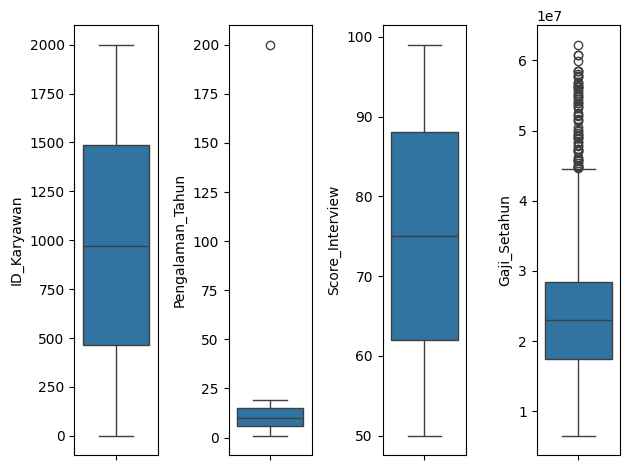

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns 

for i, col in enumerate(numeric):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(y=df_gaji[col])
plt.tight_layout()
plt.show()

In [81]:
q1 = df_gaji[numeric].quantile(0.25)
q3 = df_gaji[numeric].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

condition = ~((df_gaji[numeric] < lower) | (df_gaji[numeric] > upper)).any(axis=1)
df_filtered_numeric = df_gaji.loc[condition, numeric]
df_filtered_numeric

,ID_Karyawan,Pengalaman_Tahun,Score_Interview,Gaji_Setahun
0,1,11,69.0,3.006061e+07
1,2,17,78.0,3.683383e+07
2,3,6,56.0,2.592880e+07
3,4,11,83.0,2.122917e+07
4,5,15,77.0,2.463876e+07
...,...,...,...,...
2044,45,7,56.0,1.771400e+07
2045,46,15,54.0,2.746955e+07
2046,47,12,94.0,2.328349e+07
2048,49,10,54.0,2.650959e+07


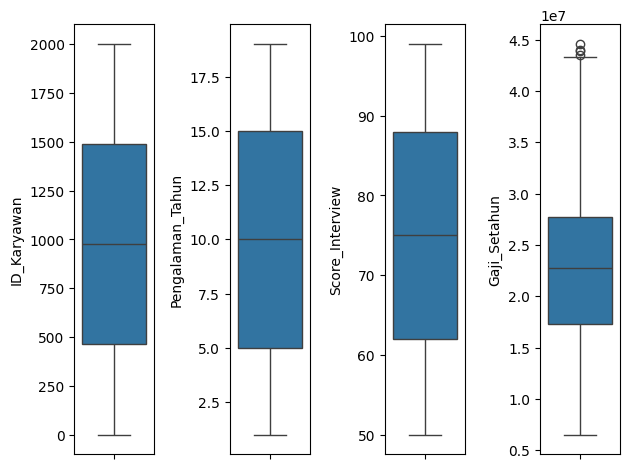

In [83]:
for i, col in enumerate(numeric):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(y=df_filtered_numeric[col])
plt.tight_layout()
plt.show()

In [85]:
categorical = df_gaji.select_dtypes('object').columns
categorical

Index(['Pendidikan', 'Posisi', 'Kota'], dtype='object')

In [86]:
df_gaji[categorical]

,Pendidikan,Posisi,Kota
0,S1,Manager,Surabaya
1,S1,Manager,Bandung
2,S2,Manager,Bandung
3,S1,Staff,Bandung
4,S1,Staff,Surabaya
...,...,...,...
2044,S2,Staff,Surabaya
2045,S3,Staff,Surabaya
2046,S2,Staff,Jakarta
2048,S1,Manager,Surabaya


In [136]:
condition_cat = df_gaji.loc[df_filtered_numeric.index, categorical]
df = pd.concat([df_filtered_numeric, condition_cat], axis= 1)
df = df.drop(columns='ID_Karyawan')

In [134]:
df_dgn_id

,ID_Karyawan,Pengalaman_Tahun,Score_Interview,Gaji_Setahun,Pendidikan,Posisi,Kota
0,1,11,69.0,3.006061e+07,S1,Manager,Surabaya
1,2,17,78.0,3.683383e+07,S1,Manager,Bandung
2,3,6,56.0,2.592880e+07,S2,Manager,Bandung
3,4,11,83.0,2.122917e+07,S1,Staff,Bandung
4,5,15,77.0,2.463876e+07,S1,Staff,Surabaya
...,...,...,...,...,...,...,...
2044,45,7,56.0,1.771400e+07,S2,Staff,Surabaya
2045,46,15,54.0,2.746955e+07,S3,Staff,Surabaya
2046,47,12,94.0,2.328349e+07,S2,Staff,Jakarta
2048,49,10,54.0,2.650959e+07,S1,Manager,Surabaya


In [128]:
df_gaji['Pendidikan'] = (
    df_gaji['Pendidikan']
    .str.lower()
    .str.strip()
)

mapping = {
    'sma' : 'SMA',
    'bachelor' : 'S1',
    's1' : 'S1',
    's2' : 'S2',
    's3' : 'S3',
}

df_gaji['Pendidikan'] = df_gaji['Pendidikan'].replace(mapping)
df_gaji

,ID_Karyawan,Pengalaman_Tahun,Pendidikan,Score_Interview,Posisi,Kota,Gaji_Setahun
0,1,11,S1,69.0,Manager,Surabaya,3.006061e+07
1,2,17,S1,78.0,Manager,Bandung,3.683383e+07
2,3,6,S2,56.0,Manager,Bandung,2.592880e+07
3,4,11,S1,83.0,Staff,Bandung,2.122917e+07
4,5,15,S1,77.0,Staff,Surabaya,2.463876e+07
...,...,...,...,...,...,...,...
2044,45,7,S2,56.0,Staff,Surabaya,1.771400e+07
2045,46,15,S3,54.0,Staff,Surabaya,2.746955e+07
2046,47,12,S2,94.0,Staff,Jakarta,2.328349e+07
2048,49,10,S1,54.0,Manager,Surabaya,2.650959e+07


In [137]:
df

,Pengalaman_Tahun,Score_Interview,Gaji_Setahun,Pendidikan,Posisi,Kota
0,11,69.0,3.006061e+07,S1,Manager,Surabaya
1,17,78.0,3.683383e+07,S1,Manager,Bandung
2,6,56.0,2.592880e+07,S2,Manager,Bandung
3,11,83.0,2.122917e+07,S1,Staff,Bandung
4,15,77.0,2.463876e+07,S1,Staff,Surabaya
...,...,...,...,...,...,...
2044,7,56.0,1.771400e+07,S2,Staff,Surabaya
2045,15,54.0,2.746955e+07,S3,Staff,Surabaya
2046,12,94.0,2.328349e+07,S2,Staff,Jakarta
2048,10,54.0,2.650959e+07,S1,Manager,Surabaya


In [138]:
one_hot = pd.get_dummies(df, columns=categorical)
one_hot

,Pengalaman_Tahun,Score_Interview,Gaji_Setahun,Pendidikan_S1,Pendidikan_S2,Pendidikan_S3,Posisi_Manager,Posisi_Staff,Posisi_Vice President,Kota_Bandung,Kota_Jakarta,Kota_Surabaya
0,11,69.0,3.006061e+07,True,False,False,True,False,False,False,False,True
1,17,78.0,3.683383e+07,True,False,False,True,False,False,True,False,False
2,6,56.0,2.592880e+07,False,True,False,True,False,False,True,False,False
3,11,83.0,2.122917e+07,True,False,False,False,True,False,True,False,False
4,15,77.0,2.463876e+07,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,7,56.0,1.771400e+07,False,True,False,False,True,False,False,False,True
2045,15,54.0,2.746955e+07,False,False,True,False,True,False,False,False,True
2046,12,94.0,2.328349e+07,False,True,False,False,True,False,False,True,False
2048,10,54.0,2.650959e+07,True,False,False,True,False,False,False,False,True


Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x = one_hot.drop(columns='Gaji_Setahun')
y = one_hot['Gaji_Setahun']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

369

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

model_lr = LinearRegression()
model_gbr = GradientBoostingRegressor(random_state=42)

#training data
model_lr.fit(x_train, y_train)
model_gbr.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [169]:
from sklearn.metrics import mean_absolute_error, r2_score

pred_lr = model_lr.predict(x_test)
pred_gbr = model_gbr.predict(x_test)

akurasi = r2_score(y_test, pred_lr)
error_lr = mean_absolute_error(y_test, pred_lr)

akurasi_gbr = r2_score(y_test, pred_gbr)
error_gbr = mean_absolute_error(y_test, pred_gbr)

print(f"Akurasi dari model Linear regresion {akurasi:.4f}")
print(f'Tingkat eror pada model linear regression {error_lr:,.0f}')

print(f"Akurasi dari model Gradien Boosting Regressor {akurasi_gbr:.4f}")
print(f"Tingkat meleset dari rata-rata gradient Boosting Regressor {error_gbr:,.0f}")

Akurasi dari model Linear regresion 0.9810
Tingkat eror pada model linear regression 814,904
Akurasi dari model Gradien Boosting Regressor 0.9780
Tingkat meleset dari rata-rata gradient Boosting Regressor 876,644


In [173]:
# 1. Siapkan Data Ibu Sarah
# INGAT: Nama kolom harus sama persis dengan X_train
# Trik: Kita intip dulu nama kolomnya biar gak salah ketik


data_sarah = pd.DataFrame({
    'Pengalaman_Tahun': [5],
    'Score_Interview': [90],
    # Masukkan kolom dummy (One-Hot)
    # Hati-hati: Kolom yang TIDAK DISEBUT berarti 0 (False)
    # Sarah itu S2, Manager, Jakarta.
    'Pendidikan_S2': [1],  # Ya, dia S2
    'Pendidikan_S3': [0],
    'Posisi_Manager': [1], # Ya, dia Manager
    'Posisi_Vice President': [0],
    'Kota_Jakarta': [1],   # Ya, dia di Jakarta
    'Kota_Surabaya': [0]
})

# 2. Pastikan urutan kolom sama persis dengan saat latihan
# (Kadang one-hot bikin urutan acak, ini biar aman)
data_sarah = data_sarah.reindex(columns=x_train.columns, fill_value=0)


In [179]:
gaji_sarah = model_lr.predict(data_sarah)
print(f'Perkiraan gaji sarah adalah {gaji_sarah[0]:,.0f}')

Perkiraan gaji sarah adalah 26,374,977


In [ ]:
df_gaji